#**Problem Statement**
#To predict the price range of a mobile phone based on its technical specifications using machine learning classification models.

##**Mobile Phone Price Range Prediction**  

In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#*Loading the data*

In [349]:
df = pd.read_csv("/content/dataset.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


#Data understanding and cleaning

#*Getting the information of dataset*:-That is checking the datatypes, finding null values in dataset

In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [351]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


#*Finding null values sum from all columns respectvely*

In [352]:
df.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [353]:
df.duplicated().sum()

np.int64(0)

In [354]:
df.shape

(2000, 21)

#To find the correlation among the features:- So after analyzing the correlation i found **ram** has very correlation(~0.91) with **price_range**. Also i found some of the features which are least correlated with **price_range** like **m_dep, clock_speed, n_cores, dual_sim, wifi, touch_screen, mobile_wt** so we can drop the in future.

In [355]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


#**Exploratory Data Analysis (EDA)**  
#*Checking the distribution of target column*

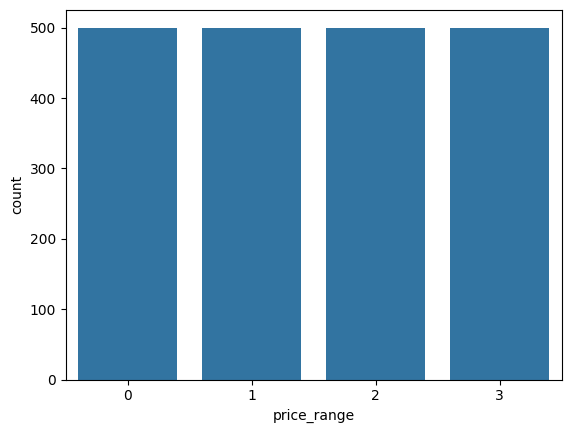

In [356]:
sns.countplot(x='price_range', data=df)
plt.show()

#**ram** vs **price_range**:- We will first find the outliers for this we will use *boxplot*

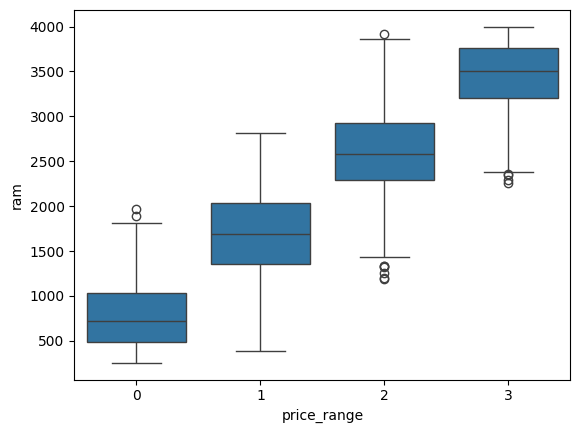

In [357]:
sns.boxplot(x='price_range',y='ram',data=df)
plt.show()

#Battery power vs price range: find outliers using boxplot

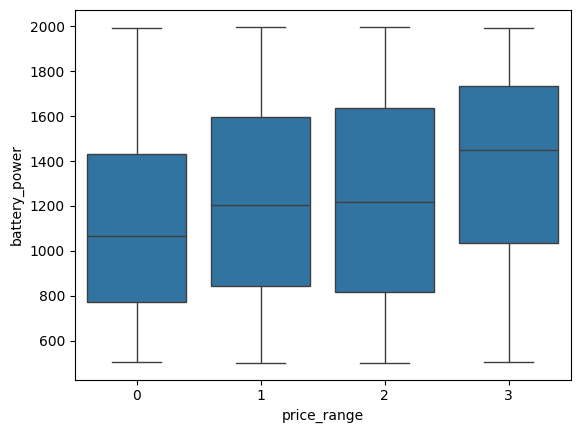

In [358]:
sns.boxplot(x='price_range',y='battery_power',data=df)
plt.show()

#**Heatmap is used to find the correlation among features**

#This plot visually shows how strong our **ram** feature is

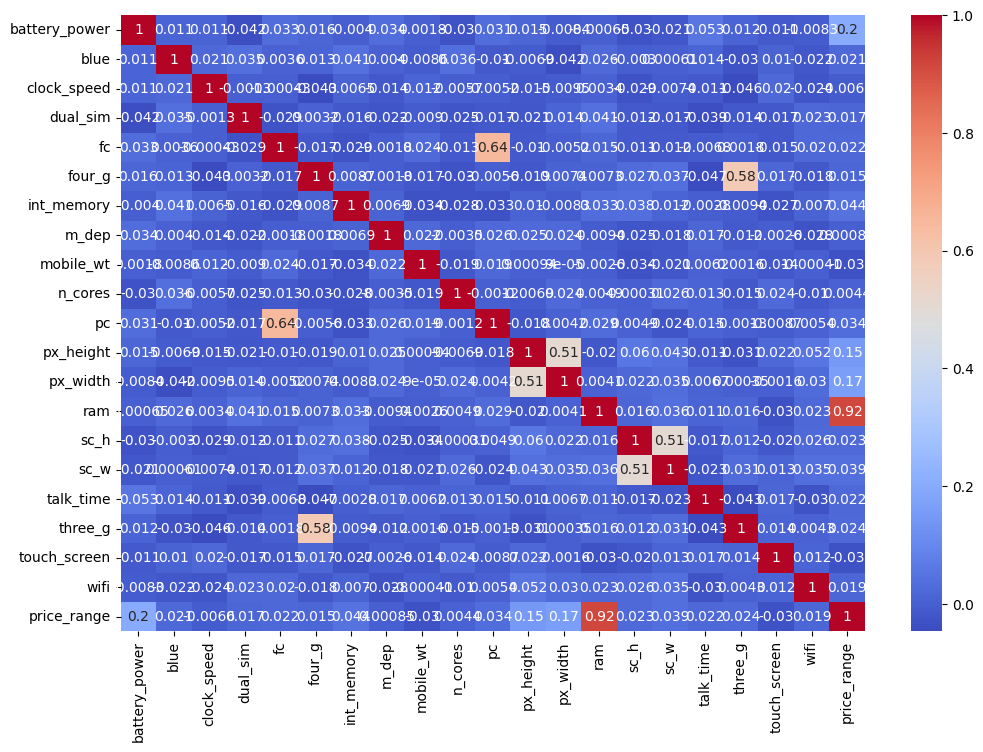

In [359]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)
plt.show()

#**Splitting the data into Features and target**

In [360]:
X = df.drop(['price_range','m_dep','clock_speed','n_cores','dual_sim','wifi','touch_screen','mobile_wt'], axis=1)
y = df['price_range']

#**Splitting the data into training and testing**

In [361]:
from sklearn.model_selection import train_test_split

#We are splitting data in such a way so that for training we take 80% of data and for testing we took 20% of data.

In [362]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

#**Performing standardisation** :- This is done to bring the data to a common scale

#I first implemented the model using independent preprocessing and training steps, then later refactored it into a pipeline for production.

In [363]:
from sklearn.preprocessing import StandardScaler

In [364]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Train Logistic Regression Model

In [365]:
from sklearn.linear_model import LogisticRegression

In [366]:
model = LogisticRegression(max_iter=1000)

#Fitting the model

In [367]:
model=model.fit(X_train_scaled, y_train)

#Model evaluation and prediction

In [368]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [369]:
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.9725
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       105
           1       0.95      1.00      0.97        91
           2       0.96      0.95      0.95        92
           3       0.98      0.96      0.97       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400

[[103   2   0   0]
 [  0  91   0   0]
 [  0   3  87   2]
 [  0   0   4 108]]


#Plotting the confusion matrix

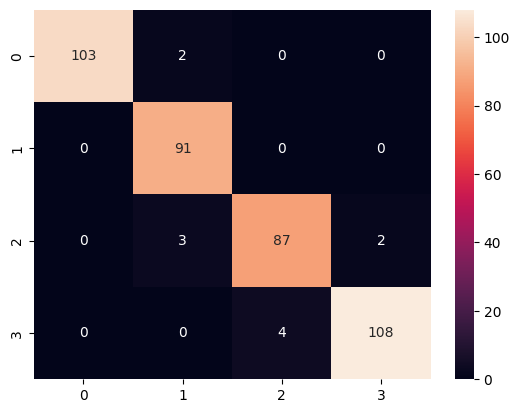

In [370]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='d')
plt.show()

#Now trying tree based algorithms

#**Using Decision Tree**:- No scaling is requried

In [371]:
from sklearn.tree import DecisionTreeClassifier

In [372]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("DT Accuracy:", accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

DT Accuracy: 0.8525
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       105
           1       0.79      0.85      0.82        91
           2       0.79      0.74      0.76        92
           3       0.87      0.91      0.89       112

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400

[[ 94  11   0   0]
 [  6  77   8   0]
 [  0   9  68  15]
 [  0   0  10 102]]


#**Using Random Forest**:- It uses multiple decision trees

In [373]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [374]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("RF Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

RF Accuracy: 0.9
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       105
           1       0.88      0.88      0.88        91
           2       0.82      0.87      0.84        92
           3       0.94      0.90      0.92       112

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400

[[ 99   6   0   0]
 [  4  80   7   0]
 [  0   5  80   7]
 [  0   0  11 101]]


#**Hyperparameter Tuning**:- To find the best set of parameters.

In [375]:
from sklearn.model_selection import GridSearchCV

In [376]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(X_train, y_train)

print(grid.best_params_)

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


#**Final Model according to Random Forest**

In [377]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Final Accuracy:", accuracy_score(y_test, y_pred))

Final Accuracy: 0.9


#*Creating confusion matrix for Random Forest*

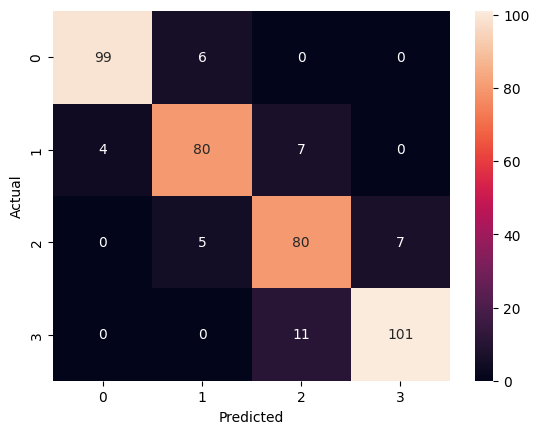

In [378]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#**Finding most important features**

In [379]:
importances = best_model.feature_importances_
features = df.drop(['price_range','m_dep','clock_speed','n_cores','dual_sim','wifi','touch_screen','mobile_wt'],axis=1).columns

feature_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_df.head(15)

,Feature,Importance
8,ram,0.536205
0,battery_power,0.092076
6,px_height,0.067679
7,px_width,0.067438
4,int_memory,0.045517
11,talk_time,0.036298
5,pc,0.035744
10,sc_w,0.034515
9,sc_h,0.032733
2,fc,0.029334


Features with low correlation and low importance were removed to reduce noise and improve model performance.

#**Making Predictions**  
#Using Logistic Regression

In [380]:
features
new_phone=[1021,1,0,1,53,6,905,1988,2631,17,3,7,1]

In [381]:
new_phone_df = pd.DataFrame([new_phone], columns=features)
new_phone_scaled = scaler.transform(new_phone_df)
prediction = model.predict(new_phone_scaled)
print(prediction)

[2]


In [382]:
price_map = {
    0: "Low Cost",
    1: "Medium Cost",
    2: "High Cost",
    3: "Very High Cost"
}
print("Predicted Price Range:", price_map[prediction[0]])

Predicted Price Range: High Cost


#**Making Predictions using**
#Random Forest

In [383]:
new_phone_df = pd.DataFrame([new_phone], columns=features)
prediction=best_model.predict(new_phone_df)
print(prediction)

[2]


In [384]:
price_map = {
    0: "Low Cost",
    1: "Medium Cost",
    2: "High Cost",
    3: "Very High Cost"
}
print("Predicted Price Range:", price_map[prediction[0]])

Predicted Price Range: High Cost


I evaluated both **Logistic Regression** and **Random Forest**. Although Random Forest is more complex, Logistic Regression achieved higher accuracy due to strong relationships in the data, so i selected it as the final model.  
#**Best Model:- Logistic Regression**  
#**Accuracy:- 97%**  
#**Key Feature that affects price range is: RAM**



*   **RAM** is the most influential feature in determining the mobile price.
*   **Logistic Regression** achieved the highest accuracy.

*   The model can help classify mobile phones into price categories effectively



